## Covid-19 dataset

*Downloaded from kaggle.com and contains the covid-19 cases until 23/3/20 for several countries*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('time_series_19-covid-Confirmed.csv')

In [3]:
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,238,428,566,673,790,900,1030,1183,1306,1306.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,NaN,Jersey,49.1900,-2.1100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
497,NaN,Puerto Rico,18.2000,-66.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
498,NaN,Republic of the Congo,-1.4400,15.5560,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
499,NaN,The Bahamas,24.2500,-76.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  327 non-null    object 
 1   Country/Region  501 non-null    object 
 2   Lat             501 non-null    float64
 3   Long            501 non-null    float64
 4   1/22/20         501 non-null    int64  
 5   1/23/20         501 non-null    int64  
 6   1/24/20         501 non-null    int64  
 7   1/25/20         501 non-null    int64  
 8   1/26/20         501 non-null    int64  
 9   1/27/20         501 non-null    int64  
 10  1/28/20         501 non-null    int64  
 11  1/29/20         501 non-null    int64  
 12  1/30/20         501 non-null    int64  
 13  1/31/20         501 non-null    int64  
 14  2/1/20          501 non-null    int64  
 15  2/2/20          501 non-null    int64  
 16  2/3/20          501 non-null    int64  
 17  2/4/20          501 non-null    int

### Exploratory data analysis

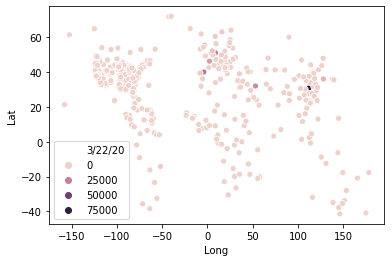

In [5]:
#we have coordinates!
#there are lots of countries with no cases at this date!
sns.scatterplot(data=df,x='Long', y='Lat', hue='3/22/20')

In [6]:
#Cleaning the data set
#Get timeseries
df=df.drop('Province/State',axis=1)

In [7]:
df.isna().sum()

Country/Region      0
Lat                 0
Long                0
1/22/20             0
1/23/20             0
                 ... 
3/19/20             0
3/20/20             0
3/21/20             0
3/22/20             0
3/23/20           192
Length: 65, dtype: int64

In [8]:
df.isna().sum().sum()

192

In [9]:
#all the null values are respecting to the last day.


In [10]:
#Muliple entries for several countries
df['Country/Region'].value_counts().head(10)

US                249
China              33
Canada             12
Australia           9
France              9
United Kingdom      7
Netherlands         4
Denmark             3
Saudi Arabia        1
Uzbekistan          1
Name: Country/Region, dtype: int64

In [11]:
sum_us=df[df['Country/Region']=='US'].drop(['Country/Region','Lat', 'Long'],axis=1).sum()
sum_us['Country/Region']='US_sum'
sum_cn=df[df['Country/Region']=='China'].drop(['Country/Region','Lat', 'Long'],axis=1).sum()
sum_cn['Country/Region']='China_sum'
sum_ca=df[df['Country/Region']=='Canada'].drop(['Country/Region','Lat', 'Long'],axis=1).sum()
sum_ca['Country/Region']='Canada_sum'
sum_fr=df[df['Country/Region']=='France'].drop(['Country/Region','Lat', 'Long'],axis=1).sum()
sum_fr['Country/Region']='France_sum'
sum_aus=df[df['Country/Region']=='Australia'].drop(['Country/Region','Lat', 'Long'],axis=1).sum()
sum_aus['Country/Region']='Australia_sum'
sum_uk=df[df['Country/Region']=='UK'].drop(['Country/Region','Lat', 'Long'],axis=1).sum()
sum_uk['Country/Region']='UK_sum'
sum_nl=df[df['Country/Region']=='Netherlands'].drop(['Country/Region','Lat', 'Long'],axis=1).sum()
sum_nl['Country/Region']='Netherlands_sum'
sum_dk=df[df['Country/Region']=='Denmark'].drop(['Country/Region','Lat', 'Long'],axis=1).sum()
sum_dk['Country/Region']='Denmark_sum'


In [12]:
l=[sum_cn, sum_fr, sum_us, sum_ca, sum_aus, sum_uk, sum_nl, sum_dk]
df=df.append(l,  ignore_index=True)




In [13]:
#df=df.drop(['US', 'China','Canada','France','Australia','UK','Netherlands','Denmark'], axis=0 )
ndx1=df[df['Country/Region']=='US'].index
ndx2=df[df['Country/Region']=='China'].index
ndx3=df[df['Country/Region']=='Canada'].index
ndx4=df[df['Country/Region']=='France'].index
ndx5=df[df['Country/Region']=='Australia'].index
ndx6=df[df['Country/Region']=='UK'].index
ndx7=df[df['Country/Region']=='Netherlands'].index
ndx8=df[df['Country/Region']=='Denmark'].index
l=[ndx1, ndx2, ndx3, ndx4, ndx5, ndx6, ndx7, ndx8]
for k in l:
    df=df.drop(k)


In [14]:
df

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,Thailand,15.0000,101.0000,2.0,3.0,5.0,7.0,8.0,8.0,14.0,...,82.0,114.0,147.0,177.0,212.0,272.0,322.0,411.0,599.0,599.0
1,Japan,36.0000,138.0000,2.0,1.0,2.0,2.0,4.0,4.0,7.0,...,773.0,839.0,825.0,878.0,889.0,924.0,963.0,1007.0,1086.0,1086.0
2,Singapore,1.2833,103.8333,0.0,1.0,3.0,3.0,4.0,5.0,7.0,...,212.0,226.0,243.0,266.0,313.0,345.0,385.0,432.0,455.0,455.0
3,Nepal,28.1667,84.2500,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0
4,Malaysia,2.5000,112.5000,0.0,0.0,0.0,3.0,4.0,4.0,4.0,...,238.0,428.0,566.0,673.0,790.0,900.0,1030.0,1183.0,1306.0,1306.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,Canada_sum,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,2.0,...,198.0,252.0,415.0,478.0,657.0,800.0,943.0,1278.0,1465.0,1470.0
505,Australia_sum,NaN,NaN,0.0,0.0,0.0,0.0,4.0,5.0,5.0,...,250.0,297.0,377.0,452.0,568.0,681.0,791.0,1071.0,1314.0,1314.0
506,UK_sum,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,Netherlands_sum,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,962.0,1138.0,1416.0,1711.0,2058.0,2467.0,3003.0,3640.0,4216.0,4216.0


In [15]:
#tmp_df.transpose()[tmp_df.transpose()['3/22/20']!=0]
df[df['3/22/20']!=0][['3/22/20', 'Country/Region']].sort_values(by='3/22/20', ascending=False).head(50)

,3/22/20,Country/Region
501,81397.0,China_sum
16,59138.0,Italy
503,33272.0,US_sum
18,28768.0,Spain
11,24873.0,Germany
155,21638.0,Iran
502,16176.0,France_sum
156,8897.0,"Korea, South"
31,7245.0,Switzerland
403,5683.0,United Kingdom


In [16]:
tmp2=df[df['3/22/20']!=0][['3/22/20', 'Country/Region']].sort_values(by='3/22/20', ascending=False).head(50)

Text(0.5, 1.0, 'Confirmed cases by country at 3/22/20')

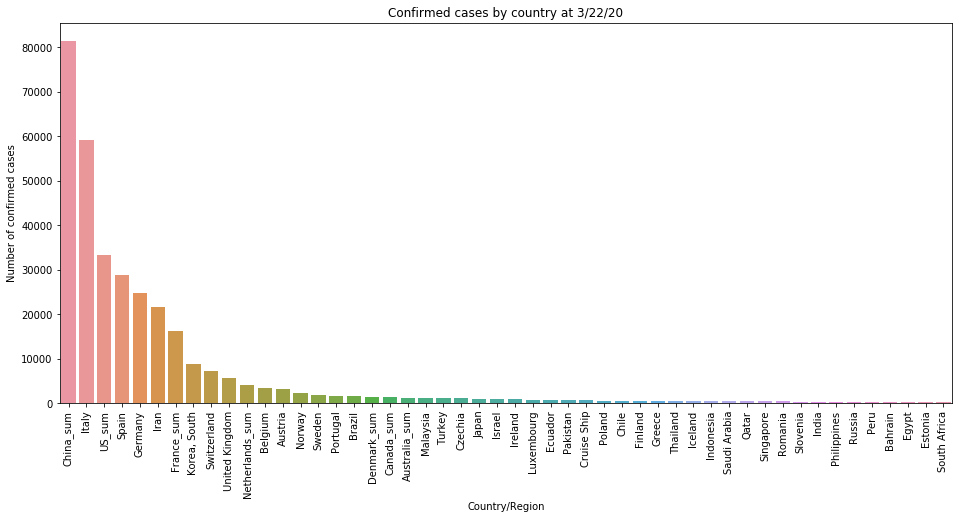

In [17]:
plt.figure(figsize=(16,7))
plt.xticks(rotation=90)
ax=sns.barplot(data=tmp2, x='Country/Region', y='3/22/20' )
ax.set(ylabel='Number of confirmed cases')
ax.set_title('Confirmed cases by country at 3/22/20')

In [18]:
#Let's plot only the countries with less than 10000 cases

In [19]:
tmp3=df[df['3/22/20']<=10000][['3/22/20', 'Country/Region']].sort_values(by='3/22/20', ascending=False).head(50)

Text(0.5, 1.0, 'Confirmed cases by country at 3/22/20')

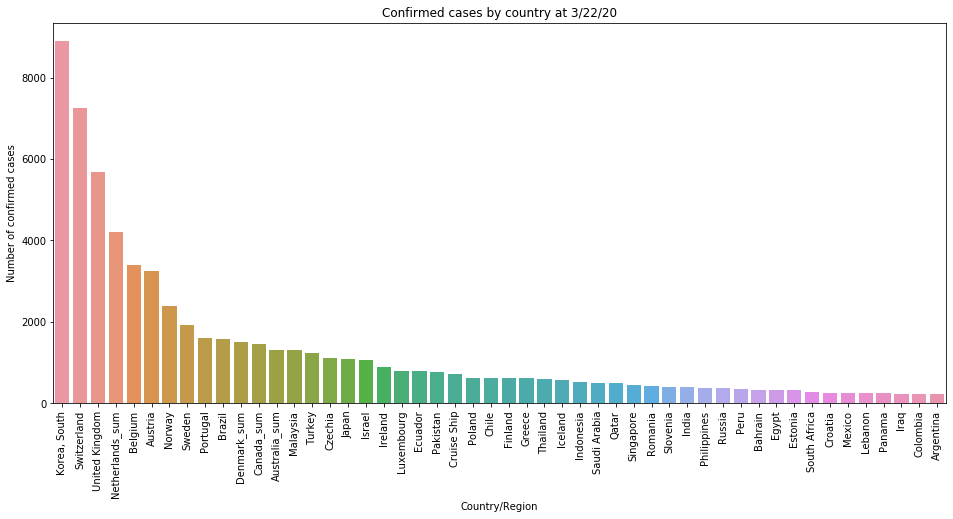

In [20]:
plt.figure(figsize=(16,7))
plt.xticks(rotation=90)
ax=sns.barplot(data=tmp3, x='Country/Region', y='3/22/20' )
ax.set(ylabel='Number of confirmed cases')
ax.set_title('Confirmed cases by country at 3/22/20')

In [21]:
#Now let's focus on the countries with the largest number of cases

In [22]:
df=df.drop(['Lat', 'Long'], axis=1)

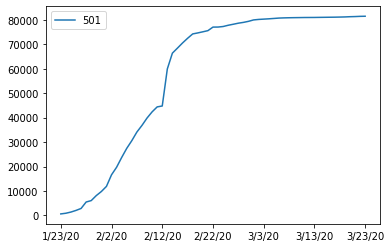

In [23]:
df[df['Country/Region']=='China_sum'].transpose()[2:].plot()

In [24]:
tmp4=df.sort_values('3/22/20', ascending=False).head(50).set_index('Country/Region').transpose()


In [25]:
tmp4.columns

Index(['China_sum', 'Italy', 'US_sum', 'Spain', 'Germany', 'Iran',
       'France_sum', 'Korea, South', 'Switzerland', 'United Kingdom',
       'Netherlands_sum', 'Belgium', 'Austria', 'Norway', 'Sweden', 'Portugal',
       'Brazil', 'Denmark_sum', 'Canada_sum', 'Australia_sum', 'Malaysia',
       'Turkey', 'Czechia', 'Japan', 'Israel', 'Ireland', 'Luxembourg',
       'Ecuador', 'Pakistan', 'Cruise Ship', 'Poland', 'Chile', 'Finland',
       'Greece', 'Thailand', 'Iceland', 'Indonesia', 'Saudi Arabia', 'Qatar',
       'Singapore', 'Romania', 'Slovenia', 'India', 'Philippines', 'Russia',
       'Peru', 'Bahrain', 'Egypt', 'Estonia', 'South Africa'],
      dtype='object', name='Country/Region')

<Figure size 1296x864 with 0 Axes>

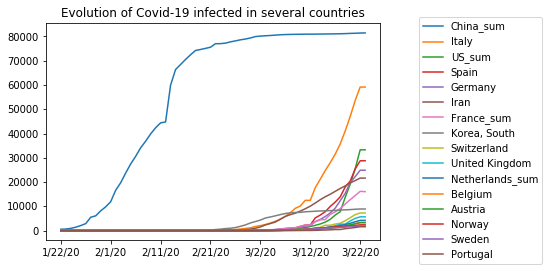

In [26]:
plt.figure(figsize=(18,12))
ax=tmp4[['China_sum', 'Italy', 'US_sum', 'Spain', 'Germany', 'Iran',
       'France_sum', 'Korea, South', 'Switzerland', 'United Kingdom',
       'Netherlands_sum', 'Belgium', 'Austria', 'Norway', 'Sweden', 'Portugal']].plot()
ax.set_title('Evolution of Covid-19 infected in several countries')
ax.legend(bbox_to_anchor=(1.1, 1.05))

<Figure size 1296x864 with 0 Axes>

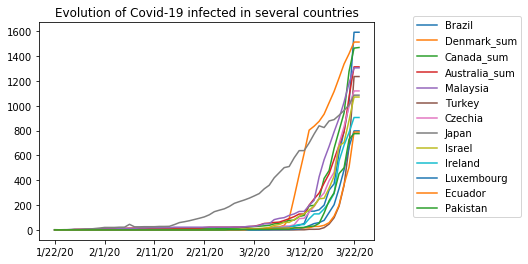

In [27]:
plt.figure(figsize=(18,12))
ax=tmp4[['Brazil', 'Denmark_sum', 'Canada_sum', 'Australia_sum', 'Malaysia',
       'Turkey', 'Czechia', 'Japan', 'Israel', 'Ireland', 'Luxembourg',
       'Ecuador', 'Pakistan']].plot()
ax.set_title('Evolution of Covid-19 infected in several countries')
ax.legend(bbox_to_anchor=(1.1, 1.05))

<Figure size 1296x864 with 0 Axes>

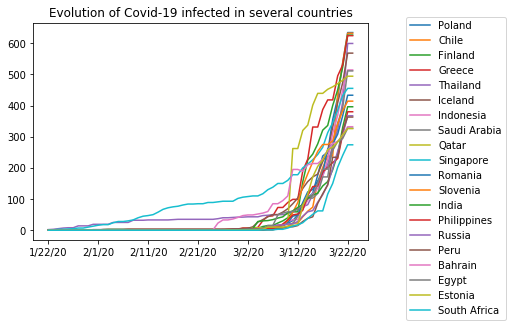

In [28]:
plt.figure(figsize=(18,12))
ax=tmp4[['Poland', 'Chile', 'Finland',
       'Greece', 'Thailand', 'Iceland', 'Indonesia', 'Saudi Arabia', 'Qatar',
       'Singapore', 'Romania', 'Slovenia', 'India', 'Philippines', 'Russia',
       'Peru', 'Bahrain', 'Egypt', 'Estonia', 'South Africa']].plot()
ax.set_title('Evolution of Covid-19 infected in several countries')
ax.legend(bbox_to_anchor=(1.1, 1.05))

Let's fit a model to the China Curve

In [29]:
len(tmp4['China_sum'])

62

In [30]:
cn_df=tmp4['China_sum'].reset_index(drop=True)

In [31]:
x=np.array(cn_df.index)

In [32]:
y=np.array(cn_df)

In [33]:
y

array([  548.,   643.,   920.,  1406.,  2075.,  2877.,  5509.,  6087.,
        8141.,  9802., 11891., 16630., 19716., 23707., 27440., 30587.,
       34110., 36814., 39829., 42354., 44386., 44759., 59895., 66358.,
       68413., 70513., 72434., 74211., 74619., 75077., 75550., 77001.,
       77022., 77241., 77754., 78166., 78600., 78928., 79356., 79932.,
       80136., 80261., 80386., 80537., 80690., 80770., 80823., 80860.,
       80887., 80921., 80932., 80945., 80977., 81003., 81033., 81058.,
       81102., 81156., 81250., 81305., 81397., 81439.])

In [34]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61])

In [116]:
#define logistic function
def logistic_model(x,a,b,c):
    return (c / (1 + np.exp(-b*(x-a))))

In [117]:
import scipy.optimize as opt

In [163]:
#bounds=([12., 0.001, y.mean()],[60., 2.5, 10*y.max()])
(a, b, c), cov =opt.curve_fit(logistic_model,x,y,  bounds=([12., 0.001, y.mean()],[60., 2.5, 10*y.max()]))


SyntaxError: positional argument follows keyword argument (<ipython-input-163-72c1aadc9d81>, line 2)

In [158]:
y_fit = logistic_model(x, a, b, c)

In [159]:
y_fit

array([ 1546.98862698,  1921.77743505,  2384.6409976 ,  2954.82033991,
        3654.99373421,  4511.48889064,  5554.27769137,  6816.61610127,
        8334.1568972 , 10143.3425044 , 12278.90083837, 14770.34724127,
       17637.56894964, 20885.8466487 , 24501.01959606, 28445.8296173 ,
       32658.62455716, 37055.3934621 , 41535.46930489, 45990.29399281,
       50313.72423238, 54411.85994632, 58210.5332432 , 61659.33056391,
       64731.99832546, 67423.91272216, 69747.73457783, 71728.39717929,
       73398.32239966, 74793.40426424, 75949.97362119, 76902.72726279,
       77683.47753369, 78320.53194171, 78838.51649004, 79258.48569066,
       79598.19913536, 79872.47944161, 80093.59518573, 80271.63416667,
       80414.84769681, 80529.95686268, 80622.41815901, 80696.64970592,
       80756.22129362, 80804.01240082, 80842.34254801, 80873.07817159,
       80897.71982897, 80917.47308752, 80933.3059793 , 80945.99545839,
       80956.16489596, 80964.31429724, 80970.84462443, 80976.07735687,
      

In [273]:
#define logistic function
#def logistic_model(x,a,b,c):
 #   return (c / (1 + np.exp(-b*(x-a))))

a,b,c
print ("Maximum of confirmed cases {:.4f} predicted".format(c))
print ("Growth rate {:.4f} cases/day".format(b))
print ("Day corresponding to the midpoint {:.0f}".format(a))

Maximum of confirmed cases 80997.1705 predicted
Growth rate 0.2217 cases/day
Day corresponding to the midpoint 18


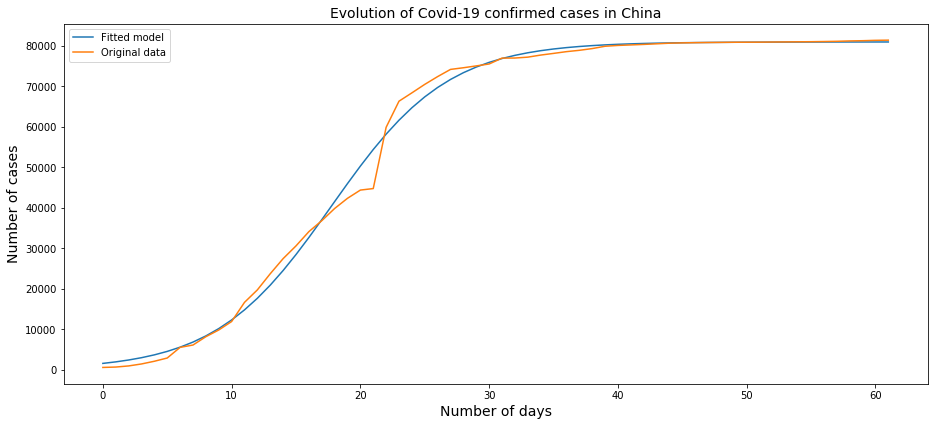

In [175]:
plt.figure(figsize=(12,5))
ax=plt.axes([0,0,1,1])
ax.set_title("Evolution of Covid-19 confirmed cases in China", fontsize=14)
ax.set_ylabel("Number of cases", fontsize=14)
ax.set_xlabel("Number of days", fontsize=14)
ax.plot(y_fit, label="Fitted model")
ax.plot(y, label="Original data")
ax.legend()


In [185]:
#assess model quality
#Check standard deviations of the parameters
a_var, b_var, c_var =[cov[i][i] for i in range(0,3)]
print ("Stdev a", np.sqrt(a_var))
print ("Stdev b", np.sqrt(b_var))
print ("Stdev c", np.sqrt(c_var))


Stdev a 0.15044748607164632
Stdev b 0.00641147745672227
Stdev c 402.11692031882325


In [355]:
print ("{} {:.4f}".format("RMSE", np.sqrt(np.sum(np.power(y_fit-y,2))/len(y))))


RMSE 2044.8024


In [198]:
residuals=y_fit-y

Text(0, 0.5, 'r')

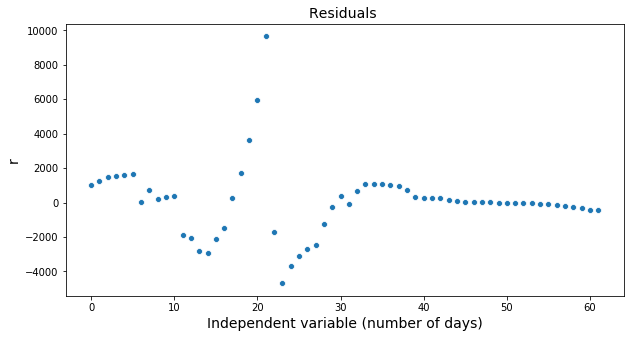

In [202]:
plt.figure(figsize=(10,5))
ax=sns.scatterplot(data=residuals)
ax.set_title("Residuals ", fontsize=14)
ax.set_xlabel("Independent variable (number of days)", fontsize=14)
ax.set_ylabel("r", fontsize=14)



In [245]:
it_df=tmp4['Italy'].reset_index(drop=True)

In [250]:
y_it=np.array(it_df)

In [251]:
x_it=np.array(it_df.index)

In [252]:
(a_it, b_it, c_it), cov_it =opt.curve_fit(logistic_model,x_it,y_it,  bounds=([12., 0.001, y_it.mean()],[60., 2.5, 10*y_it.max()]))


In [254]:
y_fit_it=logistic_model(x_it, a_it, b_it, c_it)

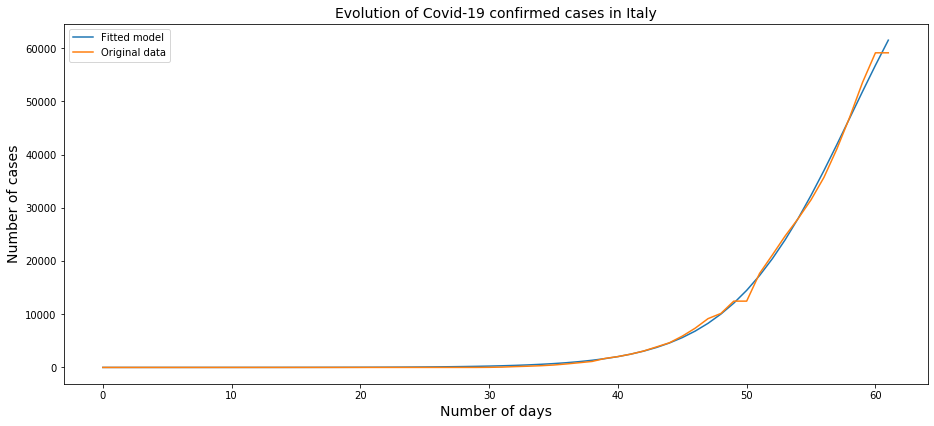

In [255]:
plt.figure(figsize=(12,5))
ax=plt.axes([0,0,1,1])
ax.set_title("Evolution of Covid-19 confirmed cases in Italy", fontsize=14)
ax.set_ylabel("Number of cases", fontsize=14)
ax.set_xlabel("Number of days", fontsize=14)
ax.plot(y_fit_it, label="Fitted model")
ax.plot(y_it, label="Original data")
ax.legend()


In [256]:
a_var, b_var, c_var =[cov_it[i][i] for i in range(0,3)]
print ("Stdev a", np.sqrt(a_var))
print ("Stdev b", np.sqrt(b_var))
print ("Stdev c", np.sqrt(c_var))


Stdev a 0.40779390058542864
Stdev b 0.005344303851507794
Stdev c 3918.882614159402


In [352]:
print ("{} {:.4f}".format("RMSE", np.sqrt(np.sum(np.power(y_fit_it-y_it,2))/len(y_it))))


RMSE 627.1867


In [366]:
residuals_log=y_fit_it-y_it

Text(0, 0.5, 'r')

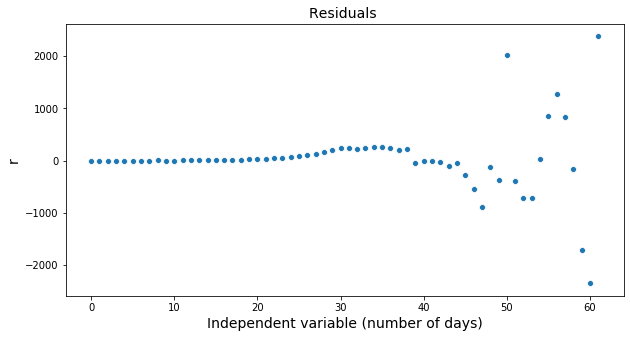

In [367]:
plt.figure(figsize=(10,5))
ax=sns.scatterplot(data=residuals_log)
ax.set_title("Residuals ", fontsize=14)
ax.set_xlabel("Independent variable (number of days)", fontsize=14)
ax.set_ylabel("r", fontsize=14)


In [328]:
#Let's try to fit an exponential
def exponential(x,a,b):
    return (1/a*np.exp(-b*x))


In [346]:
(ae, be), cov = opt.curve_fit(exponential,x_it, y_it, p0=(y_it.min(), 0.1))

In [347]:
cov

array([[9.44490478e+00, 9.78807486e-03],
       [9.78807486e-03, 1.01844901e-05]])

In [348]:
y_fit_it_exp=exponential(x_it, ae, be)

In [349]:
y_fit_it_exp

array([1.66261745e+01, 1.90486045e+01, 2.18239820e+01, 2.50037314e+01,
       2.86467695e+01, 3.28205976e+01, 3.76025514e+01, 4.30812350e+01,
       4.93581614e+01, 5.65496347e+01, 6.47889041e+01, 7.42286333e+01,
       8.50437289e+01, 9.74345815e+01, 1.11630779e+02, 1.27895359e+02,
       1.46529684e+02, 1.67879027e+02, 1.92338965e+02, 2.20362710e+02,
       2.52469508e+02, 2.89254260e+02, 3.31398543e+02, 3.79683238e+02,
       4.35003002e+02, 4.98382844e+02, 5.70997115e+02, 6.54191270e+02,
       7.49506795e+02, 8.58709770e+02, 9.83823596e+02, 1.12716648e+03,
       1.29139439e+03, 1.47955027e+03, 1.69512041e+03, 1.94209909e+03,
       2.22506250e+03, 2.54925362e+03, 2.92067931e+03, 3.34622165e+03,
       3.83376541e+03, 4.39234419e+03, 5.03230777e+03, 5.76551391e+03,
       6.60554802e+03, 7.56797492e+03, 8.67062721e+03, 9.93393569e+03,
       1.13813079e+04, 1.30395620e+04, 1.49394233e+04, 1.71160941e+04,
       1.96099052e+04, 2.24670641e+04, 2.57405104e+04, 2.94908971e+04,
      

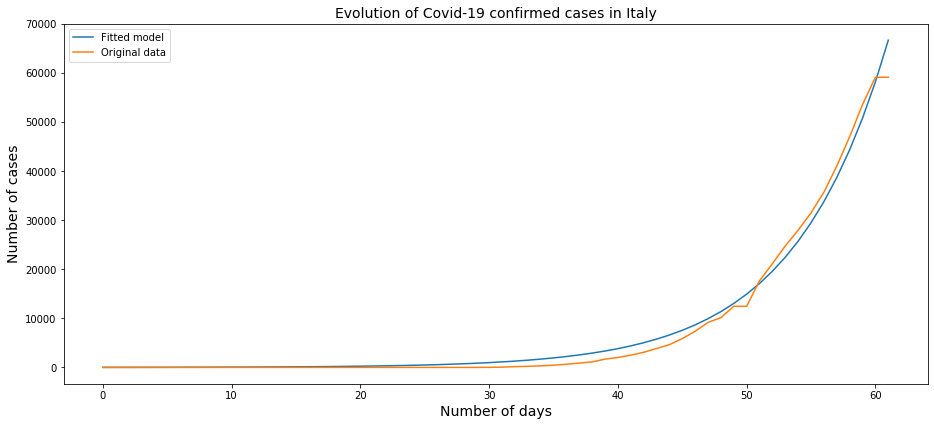

In [350]:
plt.figure(figsize=(12,5))
ax=plt.axes([0,0,1,1])
ax.set_title("Evolution of Covid-19 confirmed cases in Italy", fontsize=14)
ax.set_ylabel("Number of cases", fontsize=14)
ax.set_xlabel("Number of days", fontsize=14)
ax.plot(y_fit_it_exp, label="Fitted model")
ax.plot(y_it, label="Original data")
ax.legend()

In [359]:
print ("RMSE {:.2f}".format(np.sqrt(np.sum(np.power(y_fit_it_exp-y_it,2))/len(y_it))))

RMSE 1572.40


In [364]:
residuals_e=y_fit_it_exp-y_it

Text(0, 0.5, 'r')

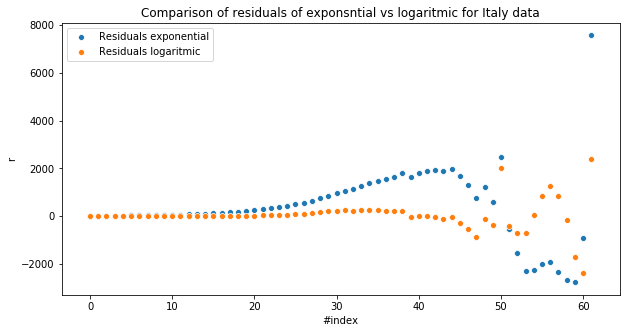

In [371]:
plt.figure(figsize=(10,5))
aax=sns.scatterplot(data=residuals_e, label='Residuals exponential')
aax=sns.scatterplot(data=residuals_log, label='Residuals logaritmic')
aax.set_title("Comparison of residuals of exponsntial vs logaritmic for Italy data")
aax.set_xlabel("#index")
aax.set_ylabel("r")


A logistic model is better to model the data, even if the values have not enetered the plateau stage (prob. because the evolution of the phenomena is going to be logistical anyway)